# Quantitative Analysis in the Brazilian Capital Market

This notebook was developed for the paper Quantitative Analysis in the Brazilian Capital Market: Preditive Modeling for Companies Financial Indicators 

By Giovanni Maniezzo



# Plataform inicialization

A célula a seguir inicializa a plataforma, carregando as bibliotecas que serão relevantes para o trabalho em seguida.

## Bibliotecas



```numpy``` -- numeric processing.

```pandas``` -- data manipulation.

```yfinacne``` -- extract financial data.

```pyplot``` -- data visualization.

```seaborn``` -- data visualization.

```sklearn``` -- machine learning tools.


In [82]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.model_selection import TimeSeriesSplit

# Importando os dados

Previously preprocessed data.
Importing 7 index 
* IPCA
* SELIC 
* IGPM
* VIX
* INCC
* IEE
* IBOV

In [83]:
#importar csv - INDÍCES =
ipca = pd.read_csv('clean_data\\ipca.csv', sep=';')
#definir index ipca como coluna Unnamed: 0
ipca = ipca.set_index('DATA')
#transformar index em datetime
ipca.index = pd.to_datetime(ipca.index, format='%Y-%m-%d')
ipca['IPCA'] = ipca['IPCA'].astype(float)
print(ipca.head())

selic = pd.read_csv('clean_data\\selic.csv', sep=';')
selic = selic.set_index('DATA')
selic.index = pd.to_datetime(selic.index, format='%Y-%m-%d')
selic['SELIC'] = selic['SELIC'].astype(float)
print(selic.head())

igpm = pd.read_csv('clean_data\\igpm.csv', sep=';')
igpm = igpm.set_index('DATA')
igpm.index = pd.to_datetime(igpm.index, format='%Y-%m-%d')
igpm['IGPM'] = igpm['IGPM'].astype(float)
print(igpm.head())

vix_data = pd.read_csv("clean_data\\VIX.csv", header=0, sep=";")
vix = vix_data.set_index('DATE')
vix.index = pd.to_datetime(vix.index)
vix['CLOSE'] = vix['CLOSE'].astype(float)
vix = vix.rename(columns={'CLOSE': 'VIX'})
print(vix.head())

#incc
incc = pd.read_csv('clean_data\\incc.csv', sep=';', index_col=0, header=0)
incc.index = pd.to_datetime(incc.index, format='%Y-%m-%d')
incc['Valor'] = incc['Valor'].astype(float)
incc = incc.rename(columns={'Valor':'INCC'})
print(incc.head())

#IEE
iee = pd.read_csv('clean_data\\iee.csv', sep=';', index_col=0, header=0)
iee.index = pd.to_datetime(iee.index, format='%Y-%m-%d')
iee = iee.rename(columns={'Valor': 'IEE'})
print(iee.head())

#IBOV
ibov = pd.read_csv('clean_data\\ibov.csv', sep=';', index_col=0, header=0)
ibov.index = pd.to_datetime(ibov.index, format='%Y-%m-%d')
ibov = ibov.rename(columns={'Close': 'IBOV'})
print(ibov.head())


dict_indices = {'ipca': ipca, 'selic': selic, 'igpm': igpm, 'vix': vix, 'ibov': ibov, 'incc': incc, 'iee': iee}
#transformar o dict_indices em um dataframe
df_indices = pd.concat(dict_indices.values(), axis=1)

            IPCA
DATA            
2011-03-31  0.79
2011-06-30  0.15
2011-09-30  0.53
2011-12-31  0.50
2012-03-31  0.21
            SELIC
DATA             
2011-03-31  11.67
2011-06-30  12.17
2011-09-30  11.90
2011-12-31  10.90
2012-03-31   9.65
            IGPM
DATA            
2011-03-31  0.62
2011-06-30 -0.18
2011-09-30  0.65
2011-12-31 -0.12
2012-03-31  0.43
              VIX
DATE             
2011-03-31  17.74
2011-06-30  16.52
2011-09-30  42.96
2011-12-31  23.40
2012-03-31  15.50
            INCC
Data            
2011-03-31  0.43
2011-06-30  0.37
2011-09-30  0.14
2011-12-31  0.11
2012-03-31  0.51
                 IEE
Data                
2011-03-31  29892.13
2011-06-30  30073.77
2011-09-30  27810.66
2011-12-31  32613.71
2012-03-31  35281.68
               IBOV
DATE               
2011-03-31  68587.0
2011-06-30  62404.0
2011-09-30  52324.0
2011-12-31  56754.0
2012-03-31  64511.0


Importação de dados das companhias de transmissão selecionadas:
* ELET4
* TRPL4
* TAEE4
* ALUP4

In [84]:
dict_empresas = {"eletrobras": pd.read_csv('clean_data\\dados_trimestrais_completos_2437.csv', sep=';', index_col=0),
        "tpaulista": pd.read_csv('clean_data\\dados_trimestrais_completos_18376.csv', sep=';', index_col=0),
        "taesa": pd.read_csv('clean_data\\dados_trimestrais_completos_20257.csv', sep=';', index_col=0),
        "alupar": pd.read_csv('clean_data\\dados_trimestrais_completos_21490.csv', sep=';', index_col=0),
    }

for key in dict_empresas.keys():
    dict_empresas[key] = dict_empresas[key].rename(columns={'3.01':'Receita de venda', '3.02':'Custos dos bens vendidos', '3.03': 'Resultado bruto',
                                                   '3.04':'Receitas/Despesas Operacionais', '3.05':'Result antes do financeiro e imp', '3.06': 'Resultado financeiro',
                                                   '3.07':'Resultado antes dos tributos', '3.08':'Imposto de renda', '3.09':'Resultado Líquido Recorrente',
                                                   '3.10': 'Resultado Líquido Não Recorrente', '3.11': 'Lucro Prejuízo'})
    print(dict_empresas[key].pop('3.99'))


print(dict_empresas['eletrobras'].head())

DT_FIM_EXERC
2011-03-31    0.0
2011-06-30    0.0
2011-09-30    0.0
2011-12-31    0.0
2012-03-31    0.0
2012-06-30    0.0
2012-09-30    0.0
2012-12-31    0.0
2013-03-31    0.0
2013-06-30    0.0
2013-09-30    0.0
2013-12-31    0.0
2014-03-31    0.0
2014-06-30    0.0
2014-09-30    0.0
2014-12-31    0.0
2015-03-31    0.0
2015-06-30    0.0
2015-09-30    0.0
2015-12-31    0.0
2016-03-31    0.0
2016-06-30    0.0
2016-09-30    0.0
2016-12-31    0.0
2017-03-31    0.0
2017-06-30    0.0
2017-09-30    0.0
2017-12-31    0.0
2018-03-31    0.0
2018-06-30    0.0
2018-09-30    0.0
2018-12-31    0.0
2019-03-31    0.0
2019-06-30    0.0
2019-09-30    0.0
2019-12-31    0.0
2020-03-31    0.0
2020-06-30    0.0
2020-09-30    0.0
2020-12-31    0.0
2021-03-31    0.0
2021-06-30    0.0
2021-09-30    0.0
2021-12-31    0.0
2022-03-31    0.0
2022-06-30    0.0
2022-09-30    0.0
2022-12-31    0.0
2023-03-31    0.0
2023-06-30    0.0
2023-09-30    0.0
2023-12-31    0.0
2024-03-31    0.0
Name: 3.99, dtype: float64
DT_FIM

In [115]:
len(dict_empresas['eletrobras'])

53

# Data stadarization

In [85]:
def standarization_time_series(serie):
    """
    Padroniza uma série temporal (z-score normalization).

    Parâmetros:
    serie (pd.Series): Série temporal a ser padronizada.

    Retorno:
    pd.Series: Série temporal padronizada.
    """
    mean = serie.mean()
    std_deviation = serie.std()
    
    standard_series = (serie - mean) / std_deviation
    print(f"Standarization completed with success - matrix shape {np.shape(standard_series)}")

    return standard_series

In [86]:
def min_max_time_series(serie):
    """
    Normaliza uma série temporal (min-max normalization).

    Parâmetros:
    serie (pd.Series): Série temporal a ser normalizada.

    Retorno:
    pd.Series: Série temporal normalizada.
    """
    min_value = serie.min()
    max_value = serie.max()
    
    normalized_series = (serie - min_value) / (max_value - min_value)
    print(f"Min-Max normalization completed with success - matrix shape {np.shape(normalized_series)}")

    return normalized_series

In [137]:
for empresa in dict_empresas.keys():
    for indicador in dict_empresas[empresa]:
        print(f"{empresa} - {indicador}")
        dict_empresas[empresa][indicador] = standarization_time_series(dict_empresas[empresa][indicador])
        #dict_empresas[empresa][indicador] = min_max_time_series(dict_empresas[empresa][indicador])	




eletrobras - Receita de venda
Standarization completed with success - matrix shape (53,)
eletrobras - Custos dos bens vendidos
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado bruto
Standarization completed with success - matrix shape (53,)
eletrobras - Receitas/Despesas Operacionais
Standarization completed with success - matrix shape (53,)
eletrobras - Result antes do financeiro e imp
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado financeiro
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado antes dos tributos
Standarization completed with success - matrix shape (53,)
eletrobras - Imposto de renda
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado Líquido Recorrente
Standarization completed with success - matrix shape (53,)
eletrobras - Resultado Líquido Não Recorrente
Standarization completed with success - matrix shape (53,)
eletrobras - Lucro Prejuízo
S

In [138]:
for indice in df_indices.columns:
    print(f'{indice}')
    df_indices[indice] = standarization_time_series(df_indices[indice])

IPCA
Standarization completed with success - matrix shape (53,)
SELIC
Standarization completed with success - matrix shape (53,)
IGPM
Standarization completed with success - matrix shape (53,)
VIX
Standarization completed with success - matrix shape (53,)
IBOV
Standarization completed with success - matrix shape (53,)
INCC
Standarization completed with success - matrix shape (53,)
IEE
Standarization completed with success - matrix shape (53,)


# Data exploratory
Visualização de dados

In [139]:
print(df_indices.describe())
dict_empresas['eletrobras'].info()
#categ = df_indices.dtype[df_indices.dtype == 'object'].index
#df_indices[categ].describe()

               IPCA         SELIC          IGPM           VIX          IBOV  \
count  5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01  5.300000e+01   
mean  -2.094760e-18  9.426422e-18  2.513713e-17  1.256856e-17 -2.513713e-17   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.939037e+00 -2.033923e+00 -2.600191e+00 -1.162442e+00 -1.312729e+00   
25%   -7.384649e-01 -8.183703e-01 -4.590022e-01 -6.142832e-01 -9.204327e-01   
50%   -4.213327e-02  1.945904e-01 -3.679604e-02 -2.625376e-01 -2.409648e-01   
75%    6.301869e-01  8.698975e-01  3.150424e-01  1.803538e-01  9.244100e-01   
max    2.647147e+00  1.275082e+00  3.702744e+00  4.489880e+00  1.997158e+00   

               INCC           IEE  
count  5.300000e+01  5.300000e+01  
mean  -7.331661e-18  2.513713e-17  
std    1.000000e+00  1.000000e+00  
min   -8.988098e-01 -1.072948e+00  
25%   -7.096242e-01 -9.028627e-01  
50%   -3.690903e-01 -4.527553e-01  
75%    3.119777e-01  1.122665e+00  


In [140]:
# y = dict_empresas['eletrobras']["Receita de venda"]
# ax1 = pd.plotting.scatter_matrix(dict_empresas['eletrobras'], alpha=0.8, figsize=(40, 40), marker='o',  hist_kwds={'bins': 20}, s=60, c=y)
#ax2 = pd.plotting.scatter_matrix(df_indices, alpha=0.8, figsize=(15, 15), marker='o',  hist_kwds={'bins': 20}, s=60)
# diagonal='kde'
# ax3 = pd.plotting.parallel_coordinates(df_indices, "IPCA")

# Método para gerar lag
* Número de 4 lags (1 ano)
* Referente a índices e indicadores

In [141]:
def creating_lag_matrix(time_series, lag):
    n = len(time_series)
    time_series_lagged = np.zeros((n-lag, lag))
    for i in range(lag, n):
        time_series_lagged[i-lag] = time_series[i-lag:i]

    print(f'Matrix {np.shape(time_series_lagged)} created with success')
    return time_series_lagged

In [142]:
# Criando matrizes com lags para cada indicador de empresas
dict_empresas_lagged = {}
for empresa in dict_empresas.keys():
    # Inicializando o dicionário para a empresa, caso ainda não exista
    if empresa not in dict_empresas_lagged:
        dict_empresas_lagged[empresa] = {}

    for indicador in dict_empresas[empresa].columns:
        time_series = dict_empresas[empresa][indicador].values

        # cria uma matriz de tamanho nx4
        print(f'Creating lagged indicator matrix - {empresa} - {indicador}')
        dict_empresas_lagged[empresa][indicador] = creating_lag_matrix(time_series, 4)


Creating lagged indicator matrix - eletrobras - Receita de venda
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Custos dos bens vendidos
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado bruto
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Receitas/Despesas Operacionais
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Result antes do financeiro e imp
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado financeiro
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado antes dos tributos
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Imposto de renda
Matrix (49, 4) created with success
Creating lagged indicator matrix - eletrobras - Resultado Líquido Recorrente
Matrix (49, 4) created with success
Creating lagged indicator 

In [143]:
# Criando matrizes de lags para os índices macro econômicos
dict_indices_lagged = {}
for indice in df_indices.columns:
    time_series = df_indices[indice].values
    #cria uma matriz de tamanho nx4
    print(f'Creating lagged index matrix - {indice}')
    dict_indices_lagged[indice] = creating_lag_matrix(time_series, 4)

Creating lagged index matrix - IPCA
Matrix (49, 4) created with success
Creating lagged index matrix - SELIC
Matrix (49, 4) created with success
Creating lagged index matrix - IGPM
Matrix (49, 4) created with success
Creating lagged index matrix - VIX
Matrix (49, 4) created with success
Creating lagged index matrix - IBOV
Matrix (49, 4) created with success
Creating lagged index matrix - INCC
Matrix (49, 4) created with success
Creating lagged index matrix - IEE
Matrix (49, 4) created with success


# Feature Selection

In [144]:
def apply_rfe(X, y, n_features_to_select=10):
    """
    Applies Recursive Feature Elimination (RFE) to a given time series dataset.
    
    Parameters:
    X (pd.DataFrame): The input features of the time series.
    y (pd.Series): The output target variable of the time series.
    n_features_to_select (int): Number of top features to select.
    
    Returns:
    pd.DataFrame: DataFrame with selected features.
    """
    # Define the model (RandomForestRegressor in this case)
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Initialize RFE with the model
    rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
    
    # Fit the RFE model
    rfe.fit(X, y)
    
    # Get the selected features
    print(rfe.support_)
    selected_features = X.columns[rfe.support_]
    
    # Return the DataFrame with only the selected features
    return X[selected_features]

In [145]:
df_indices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53 entries, 2011-03-31 to 2024-03-31
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IPCA    53 non-null     float64
 1   SELIC   53 non-null     float64
 2   IGPM    53 non-null     float64
 3   VIX     53 non-null     float64
 4   IBOV    53 non-null     float64
 5   INCC    53 non-null     float64
 6   IEE     53 non-null     float64
dtypes: float64(7)
memory usage: 3.3 KB


In [146]:
#loop para agrupar lags de índices
x_indices = pd.DataFrame()
for indice in df_indices.columns[:]:
    x = pd.DataFrame(dict_indices_lagged[indice])
    x.columns = [f'{indice} - Lag 4', f'{indice} - Lag 3', f'{indice} - Lag 2', f'{indice} - Lag 1']
    x_indices = pd.concat([x_indices, x], axis=1)

print(f"Matriz de índices criada com dimensões: {np.shape(x_indices)}")
x_indices.head()    

Matriz de índices criada com dimensões: (49, 28)


,IPCA - Lag 4,IPCA - Lag 3,IPCA - Lag 2,IPCA - Lag 1,SELIC - Lag 4,SELIC - Lag 3,SELIC - Lag 2,SELIC - Lag 1,IGPM - Lag 4,IGPM - Lag 3,...,IBOV - Lag 2,IBOV - Lag 1,INCC - Lag 4,INCC - Lag 3,INCC - Lag 2,INCC - Lag 1,IEE - Lag 4,IEE - Lag 3,IEE - Lag 2,IEE - Lag 1
0,0.654198,-0.882534,0.029901,-0.042133,0.605177,0.740239,0.667305,0.397183,-0.036796,-0.840998,...,-0.985730,-0.824308,-0.198823,-0.312335,-0.747461,-0.804217,-0.855998,-0.848254,-0.944735,-0.739972
1,-0.882534,0.029901,-0.042133,-0.738465,0.740239,0.667305,0.397183,0.059529,-0.840998,-0.006638,...,-0.824308,-0.541655,-0.312335,-0.747461,-0.804217,-0.047475,-0.848254,-0.944735,-0.739972,-0.626232
2,0.029901,-0.042133,-0.738465,-1.050614,0.667305,0.397183,0.059529,-0.280826,-0.006638,-0.780683,...,-0.541655,-0.911724,-0.747461,-0.804217,-0.047475,0.368733,-0.944735,-0.739972,-0.626232,-0.620494
3,-0.042133,-0.738465,-1.050614,0.125947,0.397183,0.059529,-0.280826,-0.550949,-0.780683,-0.227794,...,-0.911724,-0.736054,-0.804217,-0.047475,0.368733,-0.596113,-0.739972,-0.626232,-0.620494,-0.847510
4,-0.738465,-1.050614,0.125947,0.654198,0.059529,-0.280826,-0.550949,-0.618479,-0.227794,0.003414,...,-0.736054,-0.671339,-0.047475,0.368733,-0.596113,-0.709624,-0.626232,-0.620494,-0.847510,-0.902863


In [147]:
#loop para agrupar lags de indicadores
x_indicadores = pd.DataFrame()
for indicador in dict_empresas_lagged['eletrobras'].keys():
    x = pd.DataFrame(dict_empresas_lagged['eletrobras'][indicador])
    x.columns = [f'{indicador} - Lag 4', f'{indicador} - Lag 3', f'{indicador} - Lag 2', f'{indicador} - Lag 1']
    x_indicadores = pd.concat([x_indicadores, x], axis=1)

print(f"Matriz de índices criada com dimensões: {np.shape(x_indicadores)}")
x_indicadores.head()    

Matriz de índices criada com dimensões: (49, 44)


,Receita de venda - Lag 4,Receita de venda - Lag 3,Receita de venda - Lag 2,Receita de venda - Lag 1,Custos dos bens vendidos - Lag 4,Custos dos bens vendidos - Lag 3,Custos dos bens vendidos - Lag 2,Custos dos bens vendidos - Lag 1,Resultado bruto - Lag 4,Resultado bruto - Lag 3,...,Resultado Líquido Recorrente - Lag 2,Resultado Líquido Recorrente - Lag 1,Resultado Líquido Não Recorrente - Lag 4,Resultado Líquido Não Recorrente - Lag 3,Resultado Líquido Não Recorrente - Lag 2,Resultado Líquido Não Recorrente - Lag 1,Lucro Prejuízo - Lag 4,Lucro Prejuízo - Lag 3,Lucro Prejuízo - Lag 2,Lucro Prejuízo - Lag 1
0,-0.037334,-0.674382,-0.382505,0.672842,0.804533,1.332752,1.332752,-0.349234,0.392635,0.000325,...,0.315358,0.063245,-0.047282,-0.047282,-0.047282,-0.047282,0.241918,-0.002829,0.311981,0.054490
1,-0.674382,-0.382505,0.672842,0.133248,1.332752,1.332752,-0.349234,0.729006,0.000325,0.310099,...,0.063245,0.242591,-0.047282,-0.047282,-0.047282,-0.047282,-0.002829,0.311981,0.054490,0.237661
2,-0.382505,0.672842,0.133248,0.071932,1.332752,-0.349234,0.729006,0.728852,0.310099,0.526464,...,0.242591,0.263580,-0.047282,-0.047282,-0.047282,-0.047282,0.311981,0.054490,0.237661,0.259098
3,0.672842,0.133248,0.071932,0.224474,-0.349234,0.729006,0.728852,0.737064,0.526464,0.533098,...,0.263580,0.174475,-0.047282,-0.047282,-0.047282,-0.047282,0.054490,0.237661,0.259098,0.168092
4,0.133248,0.071932,0.224474,0.685861,0.729006,0.728852,0.737064,0.570318,0.533098,0.467939,...,0.174475,-2.767685,-0.047282,-0.047282,-0.047282,-0.047282,0.237661,0.259098,0.168092,-2.836829


In [148]:
#juntar os dois dataframes
X = pd.concat([x_indices, x_indicadores], axis=1)
print(f"Matriz de índices criada com dimensões: {np.shape(X)}")

Matriz de índices criada com dimensões: (49, 72)


In [220]:
#montar matriz a partir de RFE
#for indicador in dict_empresas['eletrobras'].columns:
# y = dict_empresas['eletrobras']["Receita de venda"][4:]
# x_features = apply_rfe(X, y, n_features_to_select=12)
# print(x_features.head())
#x_features.columns

#PCA
x_features = X
print(x_features.shape)

(49, 72)


In [221]:
#build a 3d matrix using the x_features array, considering the name of the columns. Array shape is (n_samples, n_features, n_lags) and the lags are defined by the column name
def build_3d_matrix(x_features):
    n_samples = x_features.shape[0]
    n_lags = 4
    n_features = int(x_features.shape[1]/n_lags)
    
    x_3d = np.zeros((n_samples, n_lags, n_features))
    
    for i in range(n_samples):
        for j in range(n_lags):
            for k in range(n_features):
                lag = 4 - j
                if(f'Lag {lag}' in x_features.columns[k]):
                    x_3d[i, j, k] = x_features.iloc[i][f'{x_features.columns[k]}']
                
    return x_3d

In [250]:
x_3d_features = build_3d_matrix(x_features)
print(x_3d_features.shape)

#PCA
from sklearn.decomposition import PCA

# x_3d_features: array 3D de características com forma (samples, time_steps, features)

# Obter as dimensões originais
samples, time_steps, features = x_3d_features.shape

# Transformar a matriz 3D em 2D
x_2d_features = x_3d_features.reshape(samples * time_steps, features)
print(f'x_2d_features shape: {x_2d_features.shape}')

# Aplicar PCA
pca = PCA(n_components=3)
x_2d_pca = pca.fit_transform(x_2d_features)
print(f'x_2d_pca shape: {x_2d_pca.shape}')

# Transformar de volta em matriz 3D
x_3d_pca = x_2d_pca.reshape(samples, time_steps, -1)
print(f'x_3d_pca shape: {x_3d_pca.shape}')

# Converter para DataFrame se necessário
x_3d_pca_df = pd.DataFrame(x_3d_pca.reshape(samples * time_steps, -1))
print(x_3d_pca_df)
x_3d_features = x_3d_pca
x_3d_features

(49, 4, 18)
x_2d_features shape: (196, 18)
x_2d_pca shape: (196, 3)
x_3d_pca shape: (49, 4, 3)
            0         1         2
0   -0.005909 -0.344144 -0.012273
1   -1.555041 -0.016667 -0.010038
2   -0.007839 -0.018580 -0.084163
3   -0.004464  0.002947 -0.616619
4   -0.001453 -1.543039 -0.025990
..        ...       ...       ...
191 -0.003709  0.010227 -0.946925
192 -0.004202 -0.463341 -0.012005
193 -2.455725 -0.016099 -0.009189
194 -0.003210  0.013029  0.332643
195 -0.005667 -0.004008 -0.357723

[196 rows x 3 columns]


array([[[-5.90916792e-03, -3.44143756e-01, -1.22728609e-02],
        [-1.55504103e+00, -1.66666142e-02, -1.00376037e-02],
        [-7.83856349e-03, -1.85799607e-02, -8.41625475e-02],
        [-4.46432959e-03,  2.94709816e-03, -6.16618652e-01]],

       [[-1.45340685e-03, -1.54303867e+00, -2.59903179e-02],
        [-5.73854073e-02, -1.41251916e-02, -9.12122636e-03],
        [-4.52887276e-03,  3.88908436e-03,  2.11327046e-01],
        [-4.93215098e-03,  1.33741055e-03, -5.78303252e-01]],

       [[-7.29930027e-03, -1.58840694e-01, -1.09696677e-02],
        [-8.54134975e-01, -1.52421490e-02, -9.45125873e-03],
        [-4.49909842e-03,  3.40476010e-03,  2.01174079e-01],
        [-5.51780600e-03, -3.51772586e-03, -3.67316295e-01]],

       [[-4.11856712e-03, -8.95725244e-01, -1.88894962e-02],
        [-7.49272970e-01, -1.44157334e-02, -8.95499238e-03],
        [-5.33399422e-03, -2.36902965e-03,  1.24665027e-01],
        [-8.04652720e-03, -2.32014783e-02,  4.68201083e-01]],

       [[-4.1741

In [251]:
zero_counter = [0, 0, 0, 0]
for i in range(0, len(x_3d_features[0])):
    for j in range(0, len(x_3d_features[0][0])):
        if x_3d_features[i][0][j] == 0:
            zero_counter[0] += 1
        if x_3d_features[i][1][j] == 0:
            zero_counter[1] += 1
        if x_3d_features[i][2][j] == 0:
            zero_counter[2] += 1
        if x_3d_features[i][3][j] == 0:
            zero_counter[3] += 1
zero_counter
#49 linhas x 20 colunas = 980 registros por lag
#Logo 3 tris antes do valor atual é a maior correlação com o valor do tri a ser previsto

[0, 0, 0, 0]

In [244]:
len(x_3d_features[0:39])
y[39:]

DT_FIM_EXERC
2021-12-31    0.660217
2022-03-31    0.111986
2022-06-30    0.034810
2022-09-30   -0.160467
2022-12-31   -0.167386
2023-03-31    0.118752
2023-06-30    0.127221
2023-09-30    0.017106
2023-12-31    0.287752
2024-03-31    0.002121
Name: Receita de venda, dtype: float64

# Aplicação de Modelos

Modelo de Regressão Linear para Benchmark

x_train shape: (39, 72)
x_test shape: (10, 72)
y_train shape: (39,)
y_test shape: (10,)
Mean Squared Error: 16.88518095735459
R^2 Score: -329.9085002511751


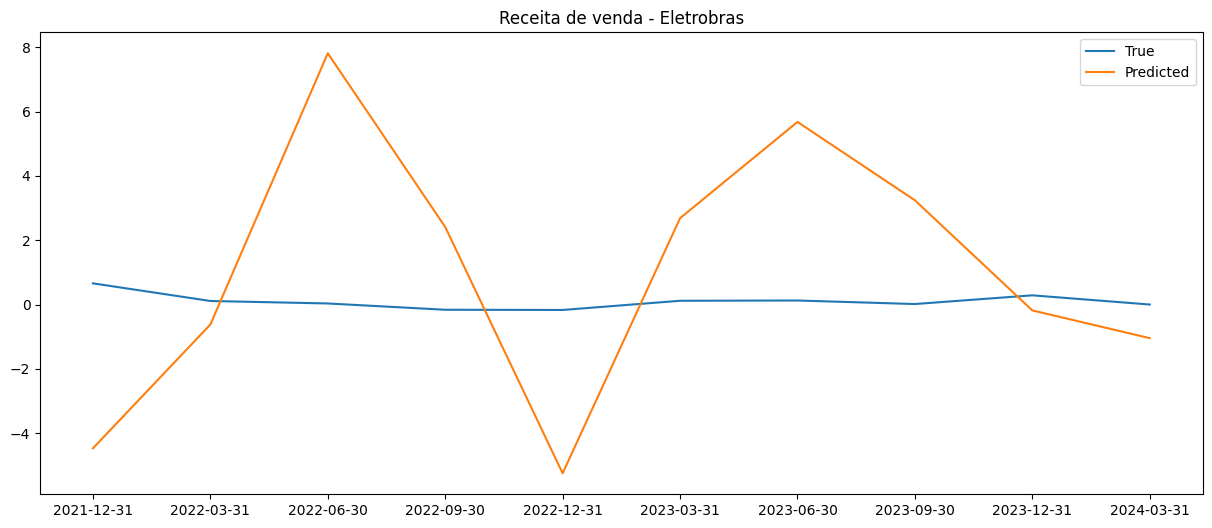

In [269]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Supondo que x e y estejam definidos
# x: array 2D de características
# y: array 1D de rótulos

y = dict_empresas['eletrobras']["Receita de venda"][4:]
# Dividir o dataset em treino e teste
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Verificar a forma dos dados
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# Criar o modelo de regressão linear
model = LinearRegression()

# Treinar o modelo
model.fit(x_train, y_train)

# Fazer previsões nos dados de teste
y_pred = model.predict(x_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

#plotar a previsão comparada com o valor real
y_pred = model.predict(x_test)
plt.figure(figsize=(15, 6))
plt.title('Receita de venda - Eletrobras')

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


Cross-validation

Fold 1
x_train shape: (44, 4, 3)
x_test shape: (5, 4, 3)
y_train shape: (44,)
y_test shape: (5,)
Epoch 1/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 2.2318 - val_loss: 0.0390
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3017 - val_loss: 0.0362
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5948 - val_loss: 0.0337
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9529 - val_loss: 0.0320
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8671 - val_loss: 0.0284
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2623 - val_loss: 0.0273
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2137 - val_loss: 0.0262
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1979 - val_loss: 0.0261
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.1562 - val_loss: 0.0262
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.7612 - val_loss: 0.0266
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9055 - val_loss: 0.0271
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.7740 - val_loss: 0.0278
Epoch 13/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 1.5644 - val_loss: 0.0268
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8062 - val_loss: 0.0282
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.1770 - val_loss: 0.0301
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0837 - val_loss: 0.0312
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9512 - val_loss: 0.0329
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8609 - val_loss: 0.0340
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3685 - val_loss: 0.0366
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9396 - val_loss: 0.0396
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2393 - val_loss: 0.0426
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8119 - val_loss: 0.0466
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 2.0718 - val_loss: 0.0526
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.4964 - val_loss: 0.0600
Epoch 13/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - loss: 1.5659 - val_loss: 0.0239
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9403 - val_loss: 0.0240
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6361 - val_loss: 0.0239
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7414 - val_loss: 0.0232
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.0502 - val_loss: 0.0228
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2675 - val_loss: 0.0235
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0351 - val_loss: 0.0245
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.9799 - val_loss: 0.0261
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0629 - val_loss: 0.0277
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6967 - val_loss: 0.0293
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8460 - val_loss: 0.0309
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.2676 - val_loss: 0.0336
Epoch 13/50
5/

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 72ms/step - loss: 0.6003 - val_loss: 0.0316
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3559 - val_loss: 0.0367
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4715 - val_loss: 0.0393
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6238 - val_loss: 0.0411
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3027 - val_loss: 0.0426
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2683 - val_loss: 0.0455
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3117 - val_loss: 0.0461
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3045 - val_loss: 0.0478
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3005 - val_loss: 0.0469
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2628 - val_loss: 0.0489
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5615 - val_loss: 0.0516
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3715 - val_loss: 0.0511
Epoch 13/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - loss: 1.0115 - val_loss: 0.0287
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.3669 - val_loss: 0.0291
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5708 - val_loss: 0.0301
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.5465 - val_loss: 0.0308
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9491 - val_loss: 0.0313
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2487 - val_loss: 0.0319
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3402 - val_loss: 0.0330
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9031 - val_loss: 0.0345
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7164 - val_loss: 0.0359
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6681 - val_loss: 0.0383
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.8406 - val_loss: 0.0412
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7611 - val_loss: 0.0444
Epoch 13/50
5

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - loss: 1.7078 - val_loss: 0.0133
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1603 - val_loss: 0.0141
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8259 - val_loss: 0.0148
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6030 - val_loss: 0.0155
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1364 - val_loss: 0.0162
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6856 - val_loss: 0.0169
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4293 - val_loss: 0.0177
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4260 - val_loss: 0.0189
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5597 - val_loss: 0.0209
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.6527 - val_loss: 0.0235
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4580 - val_loss: 0.0256
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0865 - val_loss: 0.0293
Epoch 13/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - loss: 0.7862 - val_loss: 0.0282
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8177 - val_loss: 0.0255
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9615 - val_loss: 0.0229
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8652 - val_loss: 0.0210
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7093 - val_loss: 0.0206
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9185 - val_loss: 0.0193
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8065 - val_loss: 0.0190
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1582 - val_loss: 0.0189
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5514 - val_loss: 0.0197
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1912 - val_loss: 0.0204
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2118 - val_loss: 0.0214
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6665 - val_loss: 0.0228
Epoch 13/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 1.2245 - val_loss: 0.0240
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7250 - val_loss: 0.0246
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8918 - val_loss: 0.0255
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.5559 - val_loss: 0.0265
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.9717 - val_loss: 0.0272
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8450 - val_loss: 0.0281
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6849 - val_loss: 0.0307
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1.7878 - val_loss: 0.0327
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8504 - val_loss: 0.0337
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8091 - val_loss: 0.0360
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.7391 - val_loss: 0.0382
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.7899 - val_loss: 0.0427
Epoch 13/50
5

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - loss: 1.2570 - val_loss: 0.1465
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9288 - val_loss: 0.1488
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9761 - val_loss: 0.1532
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2453 - val_loss: 0.1571
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.0009 - val_loss: 0.1593
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8692 - val_loss: 0.1596
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.3794 - val_loss: 0.1592
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7379 - val_loss: 0.1643
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2067 - val_loss: 0.1670
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.1990 - val_loss: 0.1714
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.8670 - val_loss: 0.1812
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.2655 - val_loss: 0.1921
Epoch 13/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2214670196.py:31: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 0.8971 - val_loss: 0.0167
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6136 - val_loss: 0.0172
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5898 - val_loss: 0.0176
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.8816 - val_loss: 0.0185
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9191 - val_loss: 0.0194
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.4038 - val_loss: 0.0203
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.9833 - val_loss: 0.0214
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2544 - val_loss: 0.0220
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8662 - val_loss: 0.0230
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7640 - val_loss: 0.0240
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.8764 - val_loss: 0.0249
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.6643 - val_loss: 0.0260
Epoch 13/50


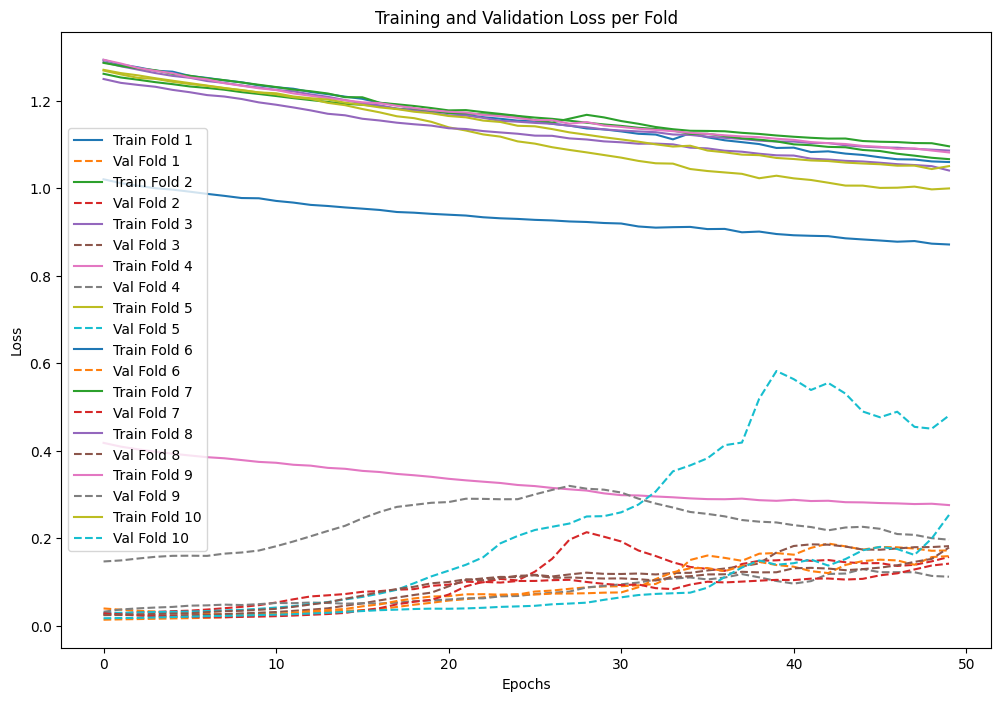

In [253]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Supondo que x_3d_features e y estejam definidos
# x_3d_features: array 3D de características
# y: array 1D de rótulos

# Definir o número de folds
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=False)

# Armazenar as perdas de cada fold
fold_losses = []
train_losses = []
val_losses = []

def create_model(learning_rate=0.01, lstm_units=50):
    model = Sequential()
    model.add(LSTM(lstm_units, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Loop através de cada fold
for fold, (train_index, test_index) in enumerate(kf.split(x_3d_features)):
    x_train, x_test = x_3d_features[train_index], x_3d_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Verificar a forma dos dados
    print(f'Fold {fold+1}')
    print(f'x_train shape: {x_train.shape}')
    print(f'x_test shape: {x_test.shape}')
    print(f'y_train shape: {y_train.shape}')
    print(f'y_test shape: {y_test.shape}')
    
    # Definir a arquitetura do modelo LSTM
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(1))
    
    # Compilar o modelo
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
    
    # Treinar o modelo
    history = model.fit(x_train, y_train, epochs=50, batch_size=9, validation_split=0.11, verbose=1)
    
    # Armazenar as perdas de treinamento e validação
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    
    # Avaliar o modelo
    loss = model.evaluate(x_test, y_test, verbose=1)
    print(f'Fold Loss: {loss}')
    fold_losses.append(loss)

# Calcular a perda média e desvio padrão
mean_loss = np.mean(fold_losses)
std_loss = np.std(fold_losses)
print(f'Mean Loss: {mean_loss}')
print(f'Standard Deviation of Loss: {std_loss}')

# Plotar as perdas de treinamento e validação para cada fold
plt.figure(figsize=(12, 8))
for i in range(n_folds):
    plt.plot(train_losses[i], label=f'Train Fold {i+1}')
    plt.plot(val_losses[i], label=f'Val Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

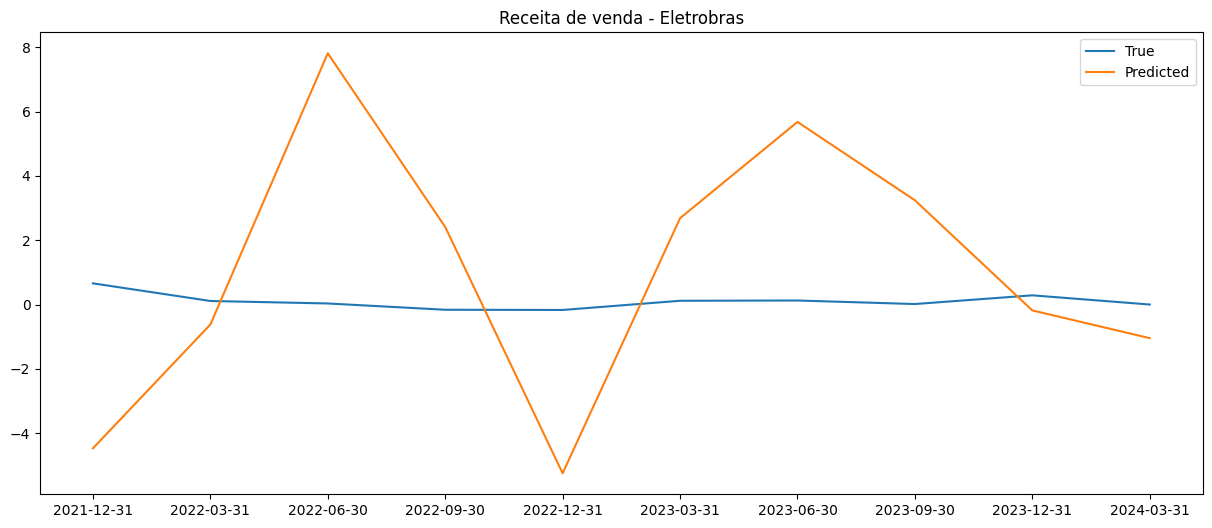

In [268]:
#plotar a previsão comparada com o valor real
y_pred = model.predict(x_test)
plt.figure(figsize=(15, 6))
plt.title('Receita de venda - Eletrobras')

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

Random Search - Otimização de hiperparâmetros

In [159]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Supondo que x_3d_features e y estejam definidos
# x_3d_features: array 3D de características
# y: array 1D de rótulos

# Definir uma função para criar o modelo
def create_model(learning_rate=0.01, lstm_units=50):
    model = Sequential()
    model.add(LSTM(lstm_units, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Definir os hiperparâmetros para a busca
param_dist = {
    'learning_rate': [0.001, 0.01, 0.1],
    'lstm_units': [50, 100, 150],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

# Definir o número de folds
n_folds = 8
kf = KFold(n_splits=n_folds, shuffle=False)


# Função para realizar a busca de hiperparâmetros manualmente
def perform_random_search(param_dist, x_train, y_train):
    best_score = float('inf')
    best_params = None
    for learning_rate in param_dist['learning_rate']:
        for lstm_units in param_dist['lstm_units']:
            for batch_size in param_dist['batch_size']:
                for epochs in param_dist['epochs']:
                    fold_mse = []
                    
                    # Validação cruzada
                    for train_idx, val_idx in kf.split(x_train):
                        x_train_fold, x_val_fold = x_train[train_idx], x_train[val_idx]
                        y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
                        
                        # Criar o modelo
                        model = create_model(learning_rate=learning_rate, lstm_units=lstm_units)
                        
                        # Treinar o modelo
                        model.fit(x_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, verbose=0)
                        
                        # Avaliar no conjunto de validação
                        val_predictions = model.predict(x_val_fold)
                        mse = mean_squared_error(y_val_fold, val_predictions)
                        fold_mse.append(mse)
                    
                    # Calcular a média da pontuação de todas as folds
                    mean_mse = np.mean(fold_mse)
                    
                    # Atualizar os melhores hiperparâmetros
                    if mean_mse < best_score:
                        best_score = mean_mse
                        best_params = {
                            'learning_rate': learning_rate,
                            'lstm_units': lstm_units,
                            'batch_size': batch_size,
                            'epochs': epochs
                        }
    
    return best_params, best_score

# Executar a busca de hiperparâmetros
best_params, best_score = perform_random_search(param_dist, x_3d_features, y)

print(f'Best params: {best_params}, Best score: {best_score}')

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\1400416179.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\1400416179.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\1400416179.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\1400416179.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\1400416179.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\1400416179.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\1400416179.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\1400416179.py:47: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


KeyboardInterrupt: 

In [49]:
print(f'Best params: {best_params}, Best score: {best_score}')

Best params: {'learning_rate': 0.001, 'lstm_units': 50, 'batch_size': 64, 'epochs': 50}, Best score: 1.1290802256836088


Modelo sem Cross-validation

In [255]:
#alimentar o array x_3d_features no modelo LSTM

#splitar os dados em treino e teste
#x_train, x_test, y_train, y_test = train_test_split(x_3d_features, y, test_size=0.2, random_state=42)
x_train = x_3d_features[0:39]
x_test  = x_3d_features[39:]
y_train = y[0:39]
y_test  = y[39:]

#definir a arquitetura do modelo LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(1))

#Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

#Treinar o modelo
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Avaliar o modelo
loss = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {loss}')

Epoch 1/50


C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 1.5324 - val_loss: 0.3143
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 1.5295 - val_loss: 0.3096
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.5266 - val_loss: 0.3050
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 1.5239 - val_loss: 0.3004
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.5211 - val_loss: 0.2958
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 1.5183 - val_loss: 0.2912
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 1.5155 - val_loss: 0.2868
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - loss: 1.5126 - val_loss: 0.2826
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - loss: 1.5098 - val_loss: 0.2784
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.5069 - val_loss: 0.2743
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.5040 - val_loss: 0.2702
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 1.5012 - val_loss: 0.2661
Epoch 13/50
1/

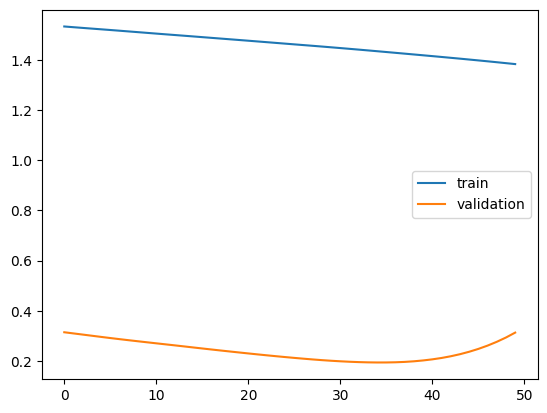

In [256]:
# Plotar o histórico de treinamento
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


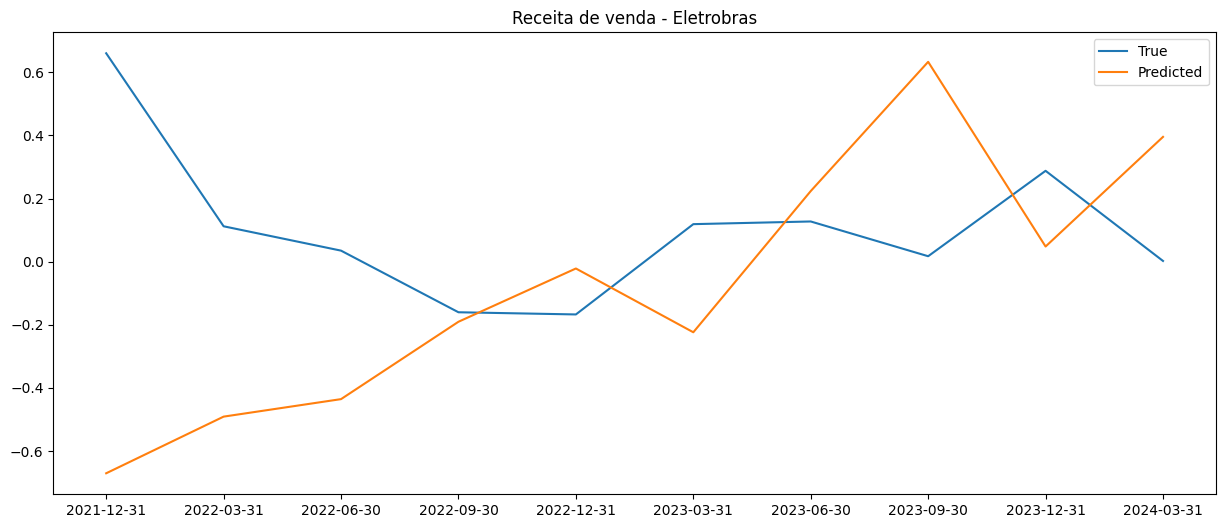

In [257]:
#plotar a previsão comparada com o valor real
y_pred = model.predict(x_test)
plt.figure(figsize=(15, 6))
plt.title('Receita de venda - Eletrobras')

plt.plot(y_test, label='True')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()


Multi-layer LSTM

Fold 1
x_train shape: (44, 4, 3)
x_test shape: (5, 4, 3)
y_train shape: (44,)
y_test shape: (5,)
Epoch 1/50


C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 184ms/step - loss: 1.2872 - val_loss: 0.0225
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9272 - val_loss: 0.0236
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9677 - val_loss: 0.0246
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0612 - val_loss: 0.0259
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.0088 - val_loss: 0.0255
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3233 - val_loss: 0.0255
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.7423 - val_loss: 0.0261
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9527 - val_loss: 0.0241
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.8563 - val_loss: 0.0250
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.8742 - val_loss: 0.0255
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7419 - val_loss: 0.0281
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.6259 - val_loss: 0.0294
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - loss: 1.2428 - val_loss: 0.0214
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7660 - val_loss: 0.0219
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.2512 - val_loss: 0.0206
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.2902 - val_loss: 0.0206
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9752 - val_loss: 0.0207
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9412 - val_loss: 0.0208
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.9679 - val_loss: 0.0211
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.8911 - val_loss: 0.0223
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.3097 - val_loss: 0.0236
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.8494 - val_loss: 0.0238
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.3238 - val_loss: 0.0268
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0602 - val_loss: 0.0318
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - loss: 0.9649 - val_loss: 0.0233
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1424 - val_loss: 0.0224
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7648 - val_loss: 0.0225
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8804 - val_loss: 0.0223
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8175 - val_loss: 0.0220
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.6228 - val_loss: 0.0216
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.7095 - val_loss: 0.0226
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.5763 - val_loss: 0.0239
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7514 - val_loss: 0.0253
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6961 - val_loss: 0.0234
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.0863 - val_loss: 0.0246
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9598 - val_loss: 0.0271
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - loss: 0.6161 - val_loss: 0.0251
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6635 - val_loss: 0.0265
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2695 - val_loss: 0.0292
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.3568 - val_loss: 0.0328
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.2890 - val_loss: 0.0356
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4174 - val_loss: 0.0393
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5980 - val_loss: 0.0416
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6147 - val_loss: 0.0422
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.5825 - val_loss: 0.0451
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5929 - val_loss: 0.0466
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3837 - val_loss: 0.0493
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2693 - val_loss: 0.0466
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 146ms/step - loss: 1.8681 - val_loss: 0.0217
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.0256 - val_loss: 0.0224
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.7832 - val_loss: 0.0230
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 1.1464 - val_loss: 0.0232
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2.0177 - val_loss: 0.0231
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9786 - val_loss: 0.0235
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.1941 - val_loss: 0.0242
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.1114 - val_loss: 0.0256
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8777 - val_loss: 0.0262
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.7318 - val_loss: 0.0265
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.2532 - val_loss: 0.0268
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1065 - val_loss: 0.0297
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - loss: 0.8263 - val_loss: 0.0236
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.5823 - val_loss: 0.0234
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.7379 - val_loss: 0.0235
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.7595 - val_loss: 0.0230
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.7066 - val_loss: 0.0220
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7093 - val_loss: 0.0218
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.1039 - val_loss: 0.0222
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5721 - val_loss: 0.0222
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7671 - val_loss: 0.0218
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.8283 - val_loss: 0.0230
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5711 - val_loss: 0.0240
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.6774 - val_loss: 0.0218
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 139ms/step - loss: 1.5974 - val_loss: 0.0233
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.8867 - val_loss: 0.0228
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.6556 - val_loss: 0.0230
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2795 - val_loss: 0.0219
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.9294 - val_loss: 0.0220
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9314 - val_loss: 0.0229
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.8915 - val_loss: 0.0230
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9847 - val_loss: 0.0239
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0927 - val_loss: 0.0253
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2545 - val_loss: 0.0250
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9230 - val_loss: 0.0264
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7419 - val_loss: 0.0284
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - loss: 1.2984 - val_loss: 0.0223
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2.1909 - val_loss: 0.0231
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0762 - val_loss: 0.0240
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.2023 - val_loss: 0.0240
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.7845 - val_loss: 0.0244
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.3644 - val_loss: 0.0244
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.2385 - val_loss: 0.0256
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9619 - val_loss: 0.0269
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.8413 - val_loss: 0.0299
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7490 - val_loss: 0.0329
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.7803 - val_loss: 0.0397
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9768 - val_loss: 0.0539
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 142ms/step - loss: 2.2142 - val_loss: 0.1059
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5898 - val_loss: 0.1089
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.9873 - val_loss: 0.1108
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2.2025 - val_loss: 0.1130
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.1016 - val_loss: 0.1157
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7167 - val_loss: 0.1198
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 1.4375 - val_loss: 0.1214
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.7459 - val_loss: 0.1272
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9555 - val_loss: 0.1383
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.0905 - val_loss: 0.1623
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.8882 - val_loss: 0.1910
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.9744 - val_loss: 0.2390
Epoch 13/50

C:\Users\giova\AppData\Local\Temp\ipykernel_371720\2563287240.py:33: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y_train, y_test = y[train_index], y[test_index]
C:\Users\giova\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - loss: 0.8893 - val_loss: 0.0163
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.6757 - val_loss: 0.0164
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.9208 - val_loss: 0.0165
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 1.6067 - val_loss: 0.0166
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.5951 - val_loss: 0.0169
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1.0691 - val_loss: 0.0173
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.9025 - val_loss: 0.0180
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.5848 - val_loss: 0.0189
Epoch 9/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.9665 - val_loss: 0.0203
Epoch 10/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.9339 - val_loss: 0.0233
Epoch 11/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.6518 - val_loss: 0.0260
Epoch 12/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 1.5479 - val_loss: 0.0283
Epoch 13/50

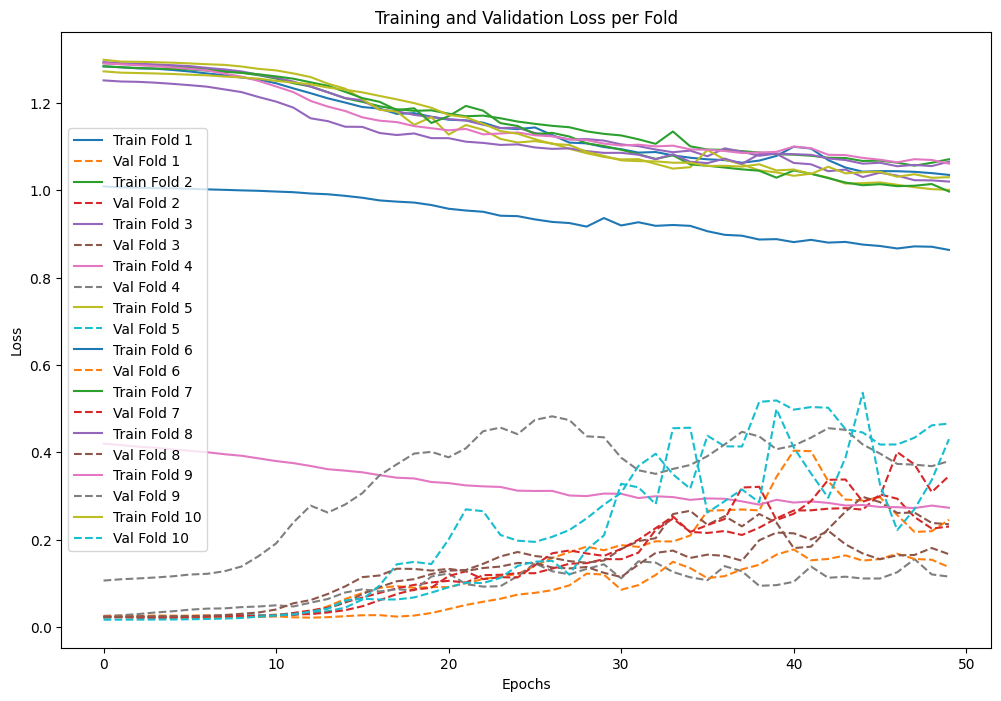

In [259]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, RandomizedSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam

# Supondo que x_3d_features e y estejam definidos
# x_3d_features: array 3D de características
# y: array 1D de rótulos

# Definir o número de folds
n_folds = 10
kf = KFold(n_splits=n_folds, shuffle=False)

# Armazenar as perdas de cada fold
fold_losses = []
train_losses = []
val_losses = []

def create_model(learning_rate=0.01, lstm_units=50):
    model = Sequential()
    model.add(LSTM(lstm_units, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
    model.add(LSTM(lstm_units, activation='relu', return_sequences=True))
    model.add(LSTM(lstm_units, activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# Loop através de cada fold
for fold, (train_index, test_index) in enumerate(kf.split(x_3d_features)):
    x_train, x_test = x_3d_features[train_index], x_3d_features[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Verificar a forma dos dados
    print(f'Fold {fold+1}')
    print(f'x_train shape: {x_train.shape}')
    print(f'x_test shape: {x_test.shape}')
    print(f'y_train shape: {y_train.shape}')
    print(f'y_test shape: {y_test.shape}')
    
    # Criar o modelo com múltiplas camadas LSTM
    model = create_model(learning_rate=0.001, lstm_units=50)
    
    # Treinar o modelo
    history = model.fit(x_train, y_train, epochs=50, batch_size=9, validation_split=0.11, verbose=1)
    
    # Armazenar as perdas de treinamento e validação
    train_losses.append(history.history['loss'])
    val_losses.append(history.history['val_loss'])
    
    # Avaliar o modelo
    loss = model.evaluate(x_test, y_test, verbose=1)
    print(f'Fold Loss: {loss}')
    fold_losses.append(loss)

# Calcular a perda média e desvio padrão
mean_loss = np.mean(fold_losses)
std_loss = np.std(fold_losses)
print(f'Mean Loss: {mean_loss}')
print(f'Standard Deviation of Loss: {std_loss}')

# Plotar as perdas de treinamento e validação para cada fold
plt.figure(figsize=(12, 8))
for i in range(n_folds):
    plt.plot(train_losses[i], label=f'Train Fold {i+1}')
    plt.plot(val_losses[i], label=f'Val Fold {i+1}', linestyle='--')

plt.title('Training and Validation Loss per Fold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

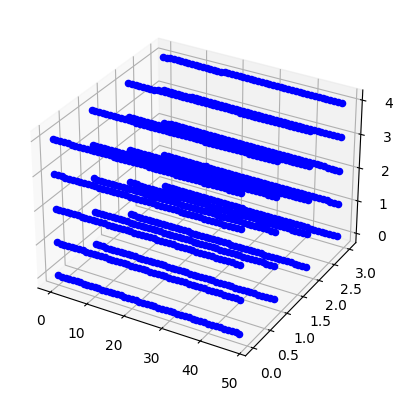

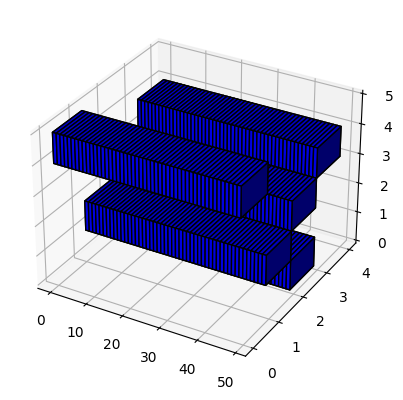

In [38]:
#visualização dos dados em 3d
import numpy as np
import matplotlib.pyplot as plt

# Criando uma figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualizando os voxels
ax.voxels(x_3d_features, facecolors='blue', edgecolor='k')

# Exibindo o gráfico
plt.show()

In [80]:
missing_values = np.shape(dict_empresas['eletrobras'])
print(f"Tamanho total da amostra de: {missing_values}")

training_set = dict_empresas['eletrobras']['Receita de venda'].iloc[:40]
testing_set = dict_empresas['eletrobras']['Receita de venda'].iloc[40:]

training_lag = create_lagged_features(4, training_set)
print(training_lag)

# Combinar as características de entrada e saída atrasadas
X = np.hstack([np.hstack(input_lagged_list), np.hstack(output_lagged_list)])
print("Matriz X criada com sucesso, shape: ", np.shape(X))

# Transformação polinomial dos dados de entrada combinados
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Dividir os dados em treinamento e teste
train_size = int(len(X_poly) * 0.8)
X_train, X_test = X_poly[:train_size], X_poly[train_size:]
y_train, y_test = output_data[lag:train_size + lag], output_data[train_size + lag:]

# Treinar o modelo de regressão linear com os dados transformados
model = LinearRegression()
model.fit(X_train, y_train)
print(f"Modelo criado, shape coeficientes: {np.shape(model.coef_)}")

Tamanho total da amostra de: (53, 11)


NameError: name 'create_lagged_features' is not defined

Montando modelo

Modelo SINDy

In [ ]:


# Função para criar características com termos de atraso para a simulação
def create_lagged_features_for_simulation(input_data, output_data, lag, poly, small_coef_indices):
    n = len(input_data)
    print(input_data.shape, output_data.shape)
    input_lagged = np.zeros((n - lag, lag))
    output_lagged = np.zeros((n - lag, lag))
    for i in range(lag, n):
        # print("Shape input_lagged: ", input_lagged[i - lag].shape)
        # print("Shape output_lagged: ", output_lagged[i - lag].shape)
        # print("Shape input: ", input_data[i - lag:i].shape)
        # print("Shape output: ", output_data[i - lag:i].shape)
        input_lagged[i - lag] = input_data[i - lag:i]
        output_lagged[i - lag] = output_data[i - lag:i]
    X = np.hstack([input_lagged, output_lagged])
    X_poly = poly.transform(X)
    print("Shape X_poly: ", X_poly)
    print("Shape small_coef_indices: ", small_coef_indices)
    X_poly_refined = np.delete(X_poly, small_coef_indices, axis=1)
    return X_poly_refined


#função para método de seleção de características
def sindy_model(input_data, output_data, lag):
    
    input_lagged_list = []
    output_lagged_list = []

    if isinstance(input_data, dict):
        for key, arr in input_data.items():
            input_lagged = create_lagged_features(arr.values.flatten(), lag)
            print(np.shape(input_lagged))
            input_lagged_list.append(input_lagged)
    else:
        # Criar características com termos de atraso
        input_lagged = create_lagged_features(input_data, lag)
        input_lagged_list.append(input_lagged)

    # Verificar se input_data é um DataFrame
    if isinstance(output_data, pd.DataFrame):
        
        # Loop para tratar cada coluna em input_data (excluindo o índice)
        for col in output_data.columns:
            output_lagged = create_lagged_features(output_data[col].values, lag)
            output_lagged_list.append(output_lagged)
        
    else:
        # Criar características com termos de atraso
        output_lagged = create_lagged_features(output_data, lag)
        output_lagged_list.append(output_lagged)
        
    # Combinar as características de entrada e saída atrasadas
    X = np.hstack([np.hstack(input_lagged_list), np.hstack(output_lagged_list)])
    print("Matriz X criada com sucesso, shape: ", np.shape(X))

    # Transformação polinomial dos dados de entrada combinados
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)

    # Dividir os dados em treinamento e teste
    train_size = int(len(X_poly) * 0.8)
    X_train, X_test = X_poly[:train_size], X_poly[train_size:]
    y_train, y_test = output_data[lag:train_size + lag], output_data[train_size + lag:]

    # Treinar o modelo de regressão linear com os dados transformados
    model = LinearRegression()
    model.fit(X_train, y_train)
    print(f"Modelo criado, shape coeficientes: {np.shape(model.coef_)}")
    
    # Identificar os coeficientes menores que 0.01
    small_coef_indices = np.where(np.abs(model.coef_) < 0.0001)[0]
    print(f"small_coef_indices shape: {np.shape(small_coef_indices)}")

    # Remover as colunas correspondentes aos coeficientes pequenos
    X_train_refined = np.delete(X_train, small_coef_indices, axis=1)
    X_test_refined = np.delete(X_test, small_coef_indices, axis=1)

    print(np.shape(X_train_refined))

    # Treinar um novo modelo com as componentes restantes
    model_refined = LinearRegression()
    model_refined.fit(X_train_refined, y_train)

    # Coeficientes e intercepto do modelo refinado
    coefficients_refined = model_refined.coef_
    intercept_refined = model_refined.intercept_

    # Obter os nomes das variáveis polinomiais
    poly_feature_names = poly.get_feature_names_out()

    # Remover os nomes correspondentes aos coeficientes pequenos
    feature_names_refined = np.delete(poly_feature_names, small_coef_indices)

    # Filtrar os coeficientes restantes para manter apenas os significativos
    significant_coefs = np.abs(coefficients_refined) >= 0.001
    coefficients_filtered = coefficients_refined[significant_coefs]
    feature_names_filtered = feature_names_refined[significant_coefs]

    model_refined.coef_ = model_refined.coef_ = np.where(np.abs(model_refined.coef_) < 0.01, 0, model_refined.coef_)

    # Exibir a forma matemática do modelo refinado com componentes significativos
    model_formula = f"{intercept_refined:.4f} + " + " + ".join(
        [f"{coef:.4f}*{name}" for coef, name in zip(coefficients_filtered, feature_names_filtered)])
    
    print(model_formula)


    return model_refined, poly, small_coef_indices

def free_run_simulation(lag, input_data, output_data, model_refined, poly, small_coef_indices):
    # Realizar a simulação "free run"
    y_pred_free_run = []
    #inicializar outputs com o número de lags de zeros para o "free run"
    output_sim = [0] * lag

    for i in range(lag, len(input_data)):
        X_sim = create_lagged_features_for_simulation(input_data[:i+1], np.array(output_sim), lag, poly, small_coef_indices)
        y_pred = model_refined.predict(X_sim[-1].reshape(1, -1))
        y_pred_free_run.append(y_pred[0])
        output_sim.append(y_pred[0])

    #mostrar mse
    mse = np.mean((output_data[lag:] - y_pred_free_run) ** 2)
    print(f"MSE: {mse}")

    # Plotar os resultados
    plt.plot(output_data[lag:], label='Real', color='red')
    plt.plot(y_pred_free_run, label='Predito', color='blue')
    plt.legend()
    plt.show()



In [ ]:
#3.01             Receita de Venda de Bens e/ou Serviços
#3.02              Custo dos Bens e/ou Serviços Vendidos
#3.03                                    Resultado Bruto
#3.04                     Despesas/Receitas Operacionais
#3.05  Resultado Antes do Resultado Financeiro e dos ...
#3.06                               Resultado Financeiro
#3.07         Resultado Antes dos Tributos sobre o Lucro
#3.08  Imposto de Renda e Contribuição Social sobre o...
#3.09        Resultado Líquido das Operações Continuadas
#3.10      Resultado Líquido de Operações Descontinuadas  -> Muitos zeros
#3.11              Lucro/Prejuízo Consolidado do Período
#3.99                    Lucro por Ação - (Reais / Ação)
print(np.shape(dict_empresas['tpaulista']['3.01'].values))
#ver informações sobre o dict_indices
dict_indices['ibov'].info()

KeyError: '3.01'

In [ ]:
# Definir o número de atrasos - lag de 1 ano
lag = 4 

retorno_modelo = sindy_model(dict_indices, dict_empresas['tpaulista']['3.01'].values, lag)


#free_run_simulation(lag, dict_indices['iee'].values.flatten(), dict_empresas['tpaulista']['3.01'].values, retorno_modelo[0], retorno_modelo[1], retorno_modelo[2])
# Legenda variáveis
# x0 = [uk] Valor atual da entrada
# x1 = [uk-1] Primeiro valor de atraso da entrada
# x2 = [uk-2] Segundo valor de atraso da entrada
# x3 = [uk-3] Segundo valor de atraso da entrada
# x4 = [uk-4] Segundo valor de atraso da entrada
# x4 = [yk-1] Primeiro valor de atraso da saída
# x5 = [yk-2] Segundo valor de atraso da saída
# x6 = [yk-3] Segundo valor de atraso da saída
# x7 = [yk-4] Segundo valor de atraso da saída

(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)
(49, 4)


In [ ]:
free_run_simulation(lag, dict_indices, dict_empresas['tpaulista']['3.01'].values, retorno_modelo[0], retorno_modelo[1], retorno_modelo[2])